#**House Price Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
data = pd.read_csv('/content/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


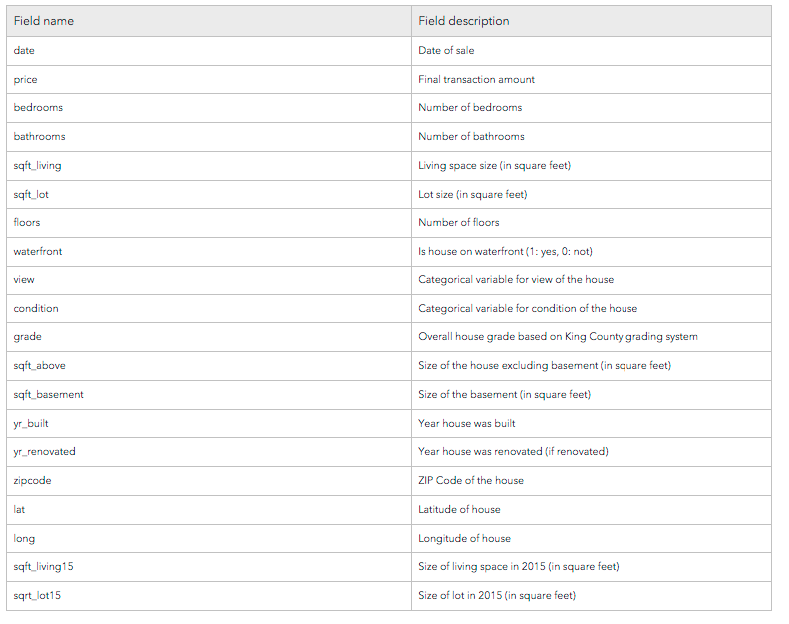

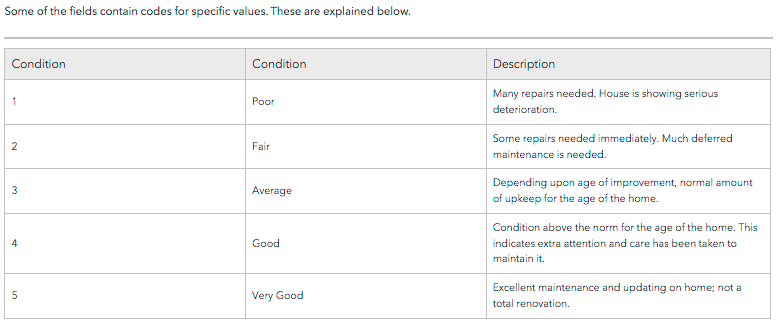

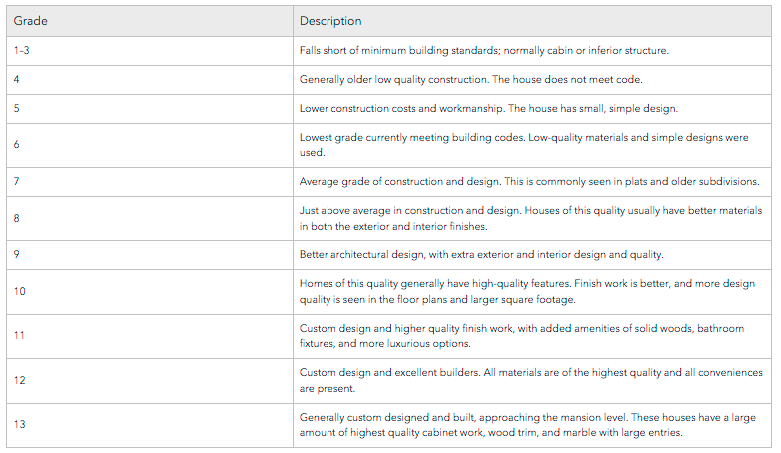

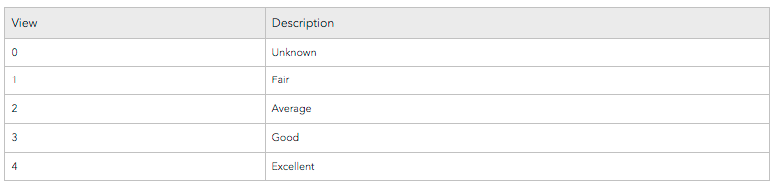

In [ ]:
SelectedFeatures.head()

,sqft_lot,sqft_living15,age,zipcode,bathrooms,bedrooms,renov_age,sqft_basement,grade
0,5650.0,1340.0,59.0,310612.76,1.00,3.0,0.0,0.0,7.0
1,7242.0,1690.0,63.0,469455.77,2.25,3.0,40.0,400.0,7.0
2,10000.0,2720.0,82.0,462480.04,1.00,2.0,0.0,0.0,6.0
3,5000.0,1360.0,49.0,551688.67,3.00,4.0,0.0,910.0,7.0
4,8080.0,1800.0,28.0,685605.78,2.00,3.0,0.0,0.0,8.0


In [ ]:
#see the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum() #you can also add .sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data=data.dropna()
data.shape

(21611, 21)

In [ ]:
data.reset_index(inplace=True)

###**Feature Creation**

In [ ]:
#format the date
d =[]
for i in data['date'].values:
    d.append(i[:4])
    
data['date'] = d

# convert everything to same datatype
for i in data.columns:
    data[i]=data[i].astype(float)
    
#make a new column age of the house  
data['age'] = data['date'] - data['yr_built']  

#calculate the total years of renovation
data['renov_age'] = np.abs(data['yr_renovated'] - data['yr_built'])

data['renov_age'] = data.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

#remove unwanted columns like yr_built, date, id
data.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
data.head()

<ipython-input-29-8f457d72e084>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = d
<ipython-input-29-8f457d72e084>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].astype(float)
<ipython-input-29-8f457d72e084>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,0.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,1.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,2.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,3.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,4.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


In [ ]:
#dealing with categorical features like zipcode
def avgprice_per_zipcode(data,column):
  values=data[column].unique()
  a=dict()
  for i in values:
    num=data.loc[data[column]==i]['price'].sum()
    den=len(data.loc[data[column]==i])
    avg=np.round(num/den,2)
    a[i]=avg
  return a 
zipcode_dict=avgprice_per_zipcode(data,'zipcode')
zipcode_dict   

{310612.76: 310612.76,
 469455.77: 469455.77,
 462480.04: 462480.04,
 551688.67: 551688.67,
 685605.78: 685605.78,
 678163.06: 678163.06,
 294111.28: 294111.28,
 302878.88: 302878.88,
 359483.24: 359483.24,
 366867.6: 366867.6,
 619900.55: 619900.55,
 579053.42: 579053.42,
 424706.36: 424706.36,
 424788.75: 424788.75,
 234284.04: 234284.04,
 386997.4: 386997.4,
 1194230.02: 1194230.02,
 334921.06: 334921.06,
 296187.98: 296187.98,
 849448.02: 849448.02,
 1095499.34: 1095499.34,
 645231.46: 645231.46,
 616990.59: 616990.59,
 576795.01: 576795.01,
 353608.64: 353608.64,
 280804.69: 280804.69,
 420890.55: 420890.55,
 464231.84: 464231.84,
 286732.79: 286732.79,
 616780.84: 616780.84,
 487479.63: 487479.63,
 284908.6: 284908.6,
 862825.23: 862825.23,
 311632.11: 311632.11,
 645507.38: 645507.38,
 493552.53: 493552.53,
 634360.18: 634360.18,
 594547.65: 594547.65,
 1355927.08: 1355927.08,
 810164.88: 810164.88,
 521652.86: 521652.86,
 790576.65: 790576.65,
 618634.17: 618634.17,
 423665.99:

In [ ]:
data['zipcode']=data['zipcode'].map(zipcode_dict)
data.head()

<ipython-input-42-0291187f57f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zipcode']=data['zipcode'].map(zipcode_dict)


,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,0.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,310612.76,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,1.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,469455.77,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,2.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,462480.04,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,3.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,551688.67,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,4.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,685605.78,47.6168,-122.045,1800.0,7503.0,28.0,0.0


In [ ]:
pickle.dump(zipcode_dict,open('zipcode_dict.pkl','wb'))

In [ ]:
zipcode=pickle.load(open('zipcode_dict.pkl','rb'))
zipcode

{98178.0: 310612.76,
 98125.0: 469455.77,
 98028.0: 462480.04,
 98136.0: 551688.67,
 98074.0: 685605.78,
 98053.0: 678163.06,
 98003.0: 294111.28,
 98198.0: 302878.88,
 98146.0: 359483.24,
 98038.0: 366867.6,
 98115.0: 619900.55,
 98107.0: 579053.42,
 98126.0: 424706.36,
 98019.0: 424788.75,
 98002.0: 234284.04,
 98133.0: 386997.4,
 98040.0: 1194230.02,
 98092.0: 334921.06,
 98030.0: 296187.98,
 98119.0: 849448.02,
 98112.0: 1095499.34,
 98052.0: 645231.46,
 98027.0: 616990.59,
 98117.0: 576795.01,
 98058.0: 353608.64,
 98001.0: 280804.69,
 98056.0: 420890.55,
 98166.0: 464231.84,
 98023.0: 286732.79,
 98007.0: 616780.84,
 98070.0: 487479.63,
 98148.0: 284908.6,
 98105.0: 862825.23,
 98042.0: 311632.11,
 98008.0: 645507.38,
 98059.0: 493552.53,
 98122.0: 634360.18,
 98144.0: 594547.65,
 98004.0: 1355927.08,
 98005.0: 810164.88,
 98034.0: 521652.86,
 98075.0: 790576.65,
 98116.0: 618634.17,
 98010.0: 423665.99,
 98118.0: 417637.43,
 98199.0: 791820.81,
 98032.0: 251296.24,
 98045.0: 439

####**Dealing With Highly Correlated Features**

In [ ]:
data.corr()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
index,1.000000,0.027391,0.010817,0.107279,0.044813,-0.026912,0.179094,-0.007626,-0.013802,-0.095413,0.082040,0.071957,-0.041655,0.009537,0.000786,0.008616,0.026633,-0.029867,-0.199436,-0.026467
price,0.027391,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.638270,0.307010,0.021613,0.585377,0.082448,-0.053946,0.117203
bedrooms,0.010817,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.125035,-0.008950,0.129516,0.391670,0.029252,-0.154393,0.016970
bathrooms,0.107279,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.226420,0.024619,0.222987,0.568626,0.087163,-0.506356,0.045944
sqft_living,0.044813,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.298209,0.052530,0.240187,0.756440,0.183301,-0.318508,0.045666
sqft_lot,-0.026912,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,-0.032128,-0.085673,0.229519,0.144605,0.718556,-0.052970,-0.001145
floors,0.179094,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.128819,0.049628,0.125446,0.279907,-0.011275,-0.489681,0.009467
waterfront,-0.007626,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,0.017283,-0.014270,-0.041913,0.086463,0.030702,0.026103,0.066725
view,-0.013802,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,0.099857,0.006172,-0.078408,0.280440,0.072569,0.053492,0.091202
condition,-0.095413,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,0.051473,-0.014965,-0.106453,-0.092795,-0.003397,0.360633,-0.058815


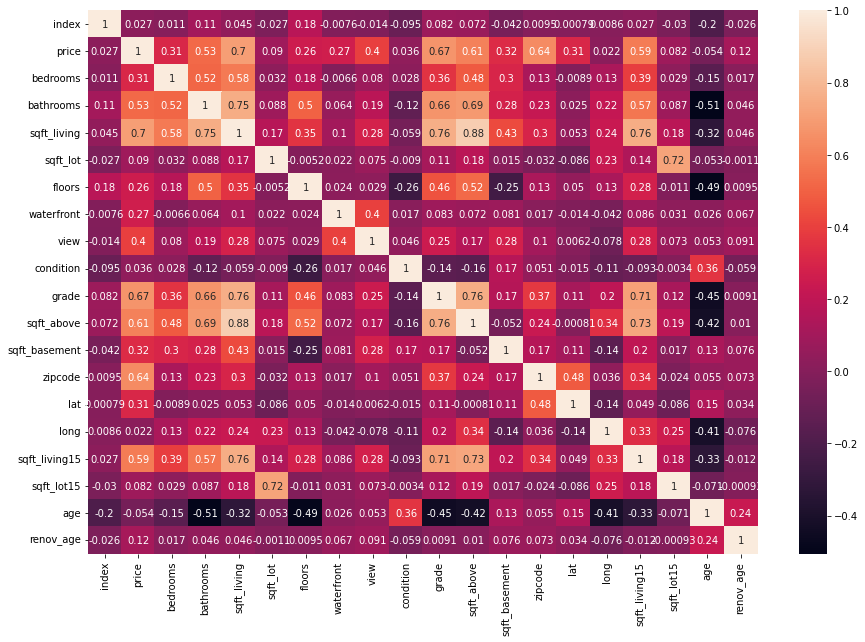

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(data.corr(), annot=True)
  
# displaying heatmap
plt.show()

**Checking Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data.copy()
X.drop(columns=['index','price'],inplace=True)  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0        bedrooms  2.330660e+01
1       bathrooms  2.867759e+01
2     sqft_living           inf
3        sqft_lot  2.368949e+00
4          floors  1.689683e+01
5      waterfront  1.210054e+00
6            view  1.551468e+00
7       condition  3.498526e+01
8           grade  1.501836e+02
9      sqft_above           inf
10  sqft_basement           inf
11        zipcode  1.029668e+01
12            lat  1.493230e+05
13           long  1.487793e+05
14  sqft_living15  2.728554e+01
15     sqft_lot15  2.583972e+00
16            age  6.875011e+00
17      renov_age  1.192593e+00


We are dropping any feature that has VIF greater than 10

In [ ]:
X.drop(columns='sqft_basement',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature            VIF
0        bedrooms      23.306598
1       bathrooms      28.677594
2     sqft_living      52.176157
3        sqft_lot       2.368949
4          floors      16.896827
5      waterfront       1.210054
6            view       1.551468
7       condition      34.985264
8           grade     150.183634
9      sqft_above      37.570421
10        zipcode      10.296681
11            lat  149322.962630
12           long  148779.316910
13  sqft_living15      27.285537
14     sqft_lot15       2.583972
15            age       6.875011
16      renov_age       1.192593


In [ ]:
X.drop(columns='lat',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature         VIF
0        bedrooms   23.294604
1       bathrooms   28.675164
2     sqft_living   52.163964
3        sqft_lot    2.368877
4          floors   16.885232
5      waterfront    1.209910
6            view    1.543375
7       condition   34.771597
8           grade  150.182710
9      sqft_above   37.562985
10        zipcode    8.309188
11           long  142.286955
12  sqft_living15   27.273554
13     sqft_lot15    2.583106
14            age    6.874365
15      renov_age    1.191166


In [ ]:
X.drop(columns='grade',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0        bedrooms  22.929677
1       bathrooms  28.526576
2     sqft_living  50.002072
3        sqft_lot   2.368552
4          floors  16.708183
5      waterfront   1.209429
6            view   1.527559
7       condition  34.771551
8      sqft_above  37.012004
9         zipcode   7.795949
10           long  68.305765
11  sqft_living15  25.937947
12     sqft_lot15   2.579444
13            age   6.566099
14      renov_age   1.190297


In [ ]:
X.drop(columns='long',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0        bedrooms  21.116756
1       bathrooms  27.719864
2     sqft_living  48.285834
3        sqft_lot   2.367263
4          floors  13.848595
5      waterfront   1.209062
6            view   1.511875
7       condition  21.932802
8      sqft_above  36.986901
9         zipcode   7.783585
10  sqft_living15  23.375992
11     sqft_lot15   2.575796
12            age   6.003841
13      renov_age   1.189697


In [ ]:
X.drop(columns='sqft_living',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0        bedrooms  20.234449
1       bathrooms  22.683551
2        sqft_lot   2.367021
3          floors  11.699503
4      waterfront   1.209034
5            view   1.442129
6       condition  21.776189
7      sqft_above  18.760671
8         zipcode   7.730195
9   sqft_living15  22.671786
10     sqft_lot15   2.575737
11            age   5.963819
12      renov_age   1.189494


In [ ]:
X.drop(columns='bathrooms',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature        VIF
0        bedrooms  17.268289
1        sqft_lot   2.366014
2          floors  10.952985
3      waterfront   1.209031
4            view   1.422162
5       condition  20.913187
6      sqft_above  17.831828
7         zipcode   7.617645
8   sqft_living15  22.351898
9      sqft_lot15   2.574162
10            age   5.236801
11      renov_age   1.160951


In [ ]:
X.drop(columns='sqft_living15',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature        VIF
0     bedrooms  16.781510
1     sqft_lot   2.363025
2       floors  10.901166
3   waterfront   1.207759
4         view   1.360742
5    condition  19.696939
6   sqft_above  11.979239
7      zipcode   6.920792
8   sqft_lot15   2.557148
9          age   5.193309
10   renov_age   1.160117


In [ ]:
X.drop(columns='condition',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0    bedrooms  13.390179
1    sqft_lot   2.363021
2      floors   9.584530
3  waterfront   1.207366
4        view   1.360299
5  sqft_above  11.951471
6     zipcode   6.703534
7  sqft_lot15   2.541547
8         age   3.386244
9   renov_age   1.105227


In [ ]:
X.drop(columns='bedrooms',inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature       VIF
0    sqft_lot  2.361859
1      floors  8.728201
2  waterfront  1.204461
3        view  1.359481
4  sqft_above  9.028528
5     zipcode  6.578931
6  sqft_lot15  2.541481
7         age  2.644906
8   renov_age  1.096525


In [ ]:
multicollinear=list(set(data.columns)-set(X.columns))
multicollinear

['sqft_living15',
 'lat',
 'P',
 'long',
 'grade',
 'condition',
 'sqft_living',
 'index',
 'bathrooms',
 'sqft_basement',
 'price',
 'bedrooms']

##**Outlier Detection**

Price Feature Before Dealing With Outliers

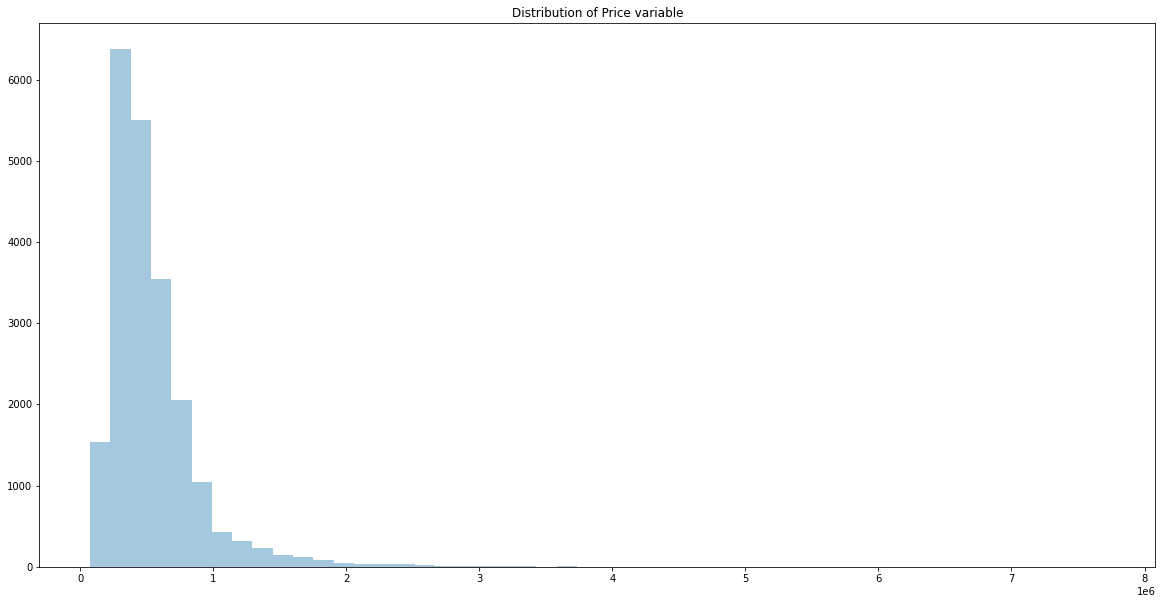

In [ ]:

#plot the (dependent) variable to see its distribution
# plt.title()
plt.figure(figsize=(20,10))
sns.distplot(x=data.price, kde=False).set_title('Distribution of Price variable')
plt.show()

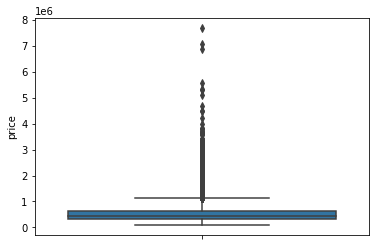

In [ ]:
# creating boxplots to see the outliers in the price variable 

plt.figure(figsize=(6,4))
sns.boxplot(y=data['price'])
plt.show()

####Using Interquartile Range

In [ ]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

Lower outliers 0
Upper outliers 1146
total outliers 1146
1129912.5 -163187.5


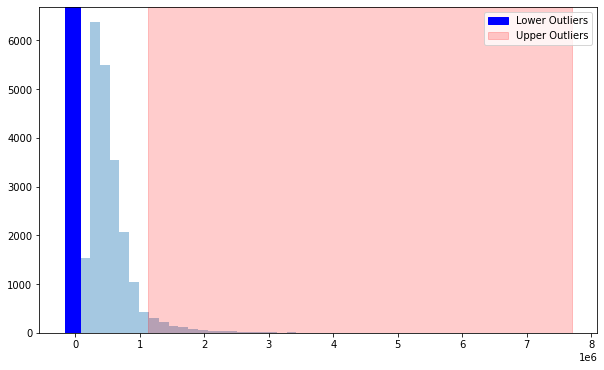

In [ ]:
#plotting outliers graph for 'price' feature 
calc_interquartile(data, 'price')
plt.figure(figsize = (10,6))
sns.distplot(x=data['price'], kde=False)
print(upper, lower)
plt.axvspan(xmin = lower,xmax= data['price'].min(),alpha=1, color='blue', label='Lower Outliers')
plt.axvspan(xmin = upper,xmax= data['price'].max(),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

####Using ZScore

In [ ]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier"""

# from scipy.stats import zscore

def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 406
1129912.5 -163187.5


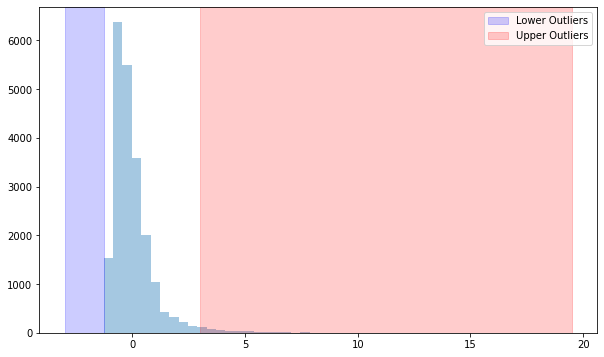

In [ ]:
#plotting outliers graph for 'price' feature 
z_score(data, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [ ]:
#remove the outliers from price using zscore
dj=[]
for i in data.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
data['P'] = dj

x = data.drop(data[data['P'] == 0.0].index) 
x.shape

<ipython-input-74-d8759a93a927>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P'] = dj


(21205, 21)

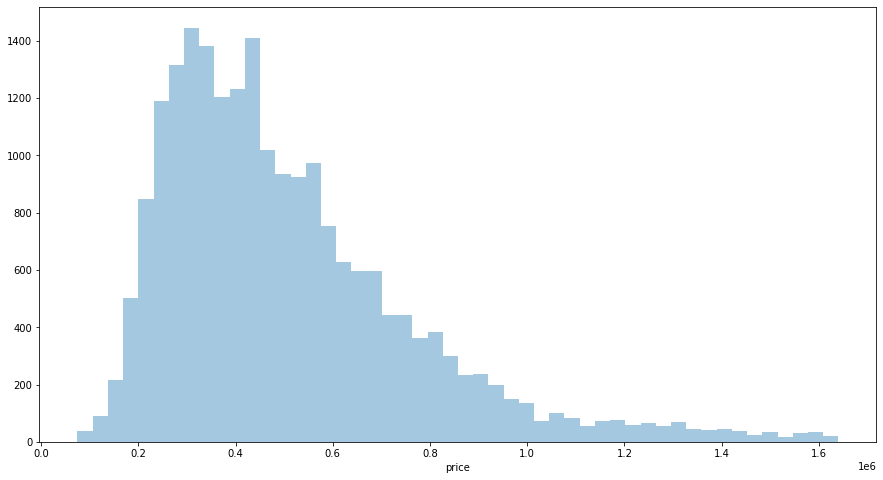

In [ ]:
plt.figure(figsize = (15,8))
sns.distplot(x['price'], kde=False)
plt.show()

##**Model Building**

In [ ]:
#defining the independent and dependent variable
X = x.drop(columns=['index','price','P']) #independent varaibles
Y = x['price'] #dependent variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
r2_score(y_test, pred)

0.8189183823009274

###**Creating Pipeline for all models**

In [ ]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [ ]:
# using KFold cross validation
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
score = 'r2'
models_score =[]
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold, scoring=score)
    models_score.append({i[0] : '{}'.format(results.mean())})

[14:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
models_score

[{'LinearRegression': '0.814814984405095'},
 {'Ridge': '0.8148152138523763'},
 {'Lasso': '0.8148150147826291'},
 {'BayesianRidge': '0.8148165991642248'},
 {'ElasticNet': '0.7836214809839707'},
 {'SGD': '0.8135213196014738'},
 {'Huber': '0.8101116290389593'},
 {'RANSAC': '0.7380439573557334'},
 {'GradientBoosting': '0.8693629211352298'},
 {'AdaBoost': '0.6400158899933371'},
 {'ExtraTree': '0.8721557256489948'},
 {'RandomForest': '0.8680335273800787'},
 {'Bagging': '0.8543783205519518'},
 {'KNeighbors': '0.8211654040669512'},
 {'DecisionTree': '0.7433680234068503'},
 {'XGB': '0.8688158876207452'}]

results might vary when run it at different times.

###**Hyperparameter Tuning**

In [ ]:
#Tuning only XGB as it has the higher accuracy
est =[]
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

best = []

parameters = {
              
              'XGB': {'XGB__learning_rate': [0.1,0.2,0.3,0.4],
                         
                         'XGB__max_depth': [4,6,8],
                      'XGB__n_estimators': [100,500,1000,1500]}
             }

for i in est:
    kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
    grid = GridSearchCV(estimator=i[1], param_grid = parameters[i[0]], cv = kfold, n_jobs=-1)
    grid.fit(x_train, y_train)
    best.append((i[0], grid.best_score_,  grid.best_params_))

[14:59:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#implementing it with best parameters
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb.score(x_test,y_test)

[14:59:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8920760183234403

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()
rf_params={'n_estimators':[20,40,60,80,100],
           'max_depth':[8,16,32,64,128,256,512],
           'warm_start':[True,False],
           'min_samples_split':[2,4,8,16,32,64]}
rcv=RandomizedSearchCV(rf,rf_params,cv=3,scoring='r2',random_state=1)
rcv.fit(x_train,y_train)
rf=rcv.best_estimator_
print(rcv.best_score_)
rf.score(x_test,y_test)

0.8652798499087458


0.868676823255042

In [ ]:
rf

RandomForestRegressor(max_depth=512, min_samples_split=4, warm_start=True)

In [ ]:
x_train

,sqft_lot,sqft_living15,age,zipcode,bathrooms,bedrooms,renov_age,sqft_basement,grade
1301,9467.0,1570.0,60.0,676185.39,1.00,3.0,0.0,0.0,7.0
2610,30605.0,1930.0,26.0,311632.11,2.50,3.0,0.0,0.0,8.0
16886,22529.0,3860.0,18.0,569958.47,4.00,5.0,0.0,1520.0,11.0
15473,7200.0,1550.0,104.0,791820.81,1.50,2.0,77.0,0.0,7.0
14016,8000.0,1590.0,31.0,304262.11,2.00,2.0,0.0,680.0,7.0
...,...,...,...,...,...,...,...,...,...
11471,3340.0,1700.0,102.0,579053.42,1.75,2.0,0.0,140.0,6.0
12161,6752.0,1870.0,20.0,294111.28,2.50,3.0,0.0,0.0,8.0
5482,4000.0,2070.0,74.0,1095499.34,1.75,2.0,0.0,670.0,7.0
873,4764.0,2360.0,24.0,901258.27,0.00,0.0,0.0,0.0,7.0


## **Feature Selection**

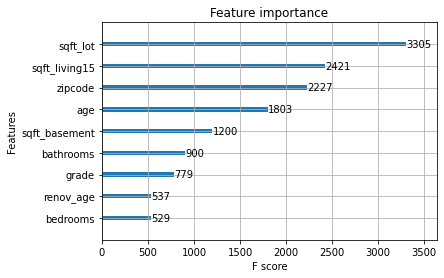

In [ ]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

I will use the top 9 features as my final fetaures to build my model and deploy it. I can also consider all these important features shown above. 
NB: **Lat** and **Long** are very important features in this regard. They are telling us that the location of the building is an important factor in determining the price or value of the property. The zip code is also telling us the same thing. In this example, I will omit the **Lat** and **Long** because if i do the deployment and I want people to check the value of their property, it is mostly difficult for them to provide the exact latitude and logitute of their property. In reality, I would have gone extra mile to collect extra data on the location of the properties or houses and add that data to my dataset which i can use to build my model instead of using latitude and longitude.

I will rather include the **zipcode** which also tells us the location of the houses.

In [ ]:
x

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age,P
0,0.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,...,1180.0,0.0,310612.76,47.5112,-122.257,1340.0,5650.0,59.0,0.0,221900.0
1,1.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,...,2170.0,400.0,469455.77,47.7210,-122.319,1690.0,7639.0,63.0,40.0,538000.0
2,2.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,...,770.0,0.0,462480.04,47.7379,-122.233,2720.0,8062.0,82.0,0.0,180000.0
3,3.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,...,1050.0,910.0,551688.67,47.5208,-122.393,1360.0,5000.0,49.0,0.0,604000.0
4,4.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,...,1680.0,0.0,685605.78,47.6168,-122.045,1800.0,7503.0,28.0,0.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,21608.0,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,...,1530.0,0.0,585085.47,47.6993,-122.346,1530.0,1509.0,5.0,0.0,360000.0
21607,21609.0,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,...,2310.0,0.0,359483.24,47.5107,-122.362,1830.0,7200.0,1.0,0.0,400000.0
21608,21610.0,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,...,1020.0,0.0,594547.65,47.5944,-122.299,1020.0,2007.0,5.0,0.0,402101.0
21609,21611.0,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,...,1600.0,0.0,616990.59,47.5345,-122.069,1410.0,1287.0,11.0,0.0,400000.0


In [ ]:
Y #Y contains only the price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21606    360000.0
21607    400000.0
21608    402101.0
21609    400000.0
21610    325000.0
Name: price, Length: 21205, dtype: float64

In [ ]:
SelectedFeatures = x[['sqft_lot','sqft_living15','age','zipcode','bathrooms','bedrooms','renov_age','sqft_basement','grade']]
SelectedFeatures

,sqft_lot,sqft_living15,age,zipcode,bathrooms,bedrooms,renov_age,sqft_basement,grade
0,5650.0,1340.0,59.0,310612.76,1.00,3.0,0.0,0.0,7.0
1,7242.0,1690.0,63.0,469455.77,2.25,3.0,40.0,400.0,7.0
2,10000.0,2720.0,82.0,462480.04,1.00,2.0,0.0,0.0,6.0
3,5000.0,1360.0,49.0,551688.67,3.00,4.0,0.0,910.0,7.0
4,8080.0,1800.0,28.0,685605.78,2.00,3.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
21606,1131.0,1530.0,5.0,585085.47,2.50,3.0,0.0,0.0,8.0
21607,5813.0,1830.0,1.0,359483.24,2.50,4.0,0.0,0.0,8.0
21608,1350.0,1020.0,5.0,594547.65,0.75,2.0,0.0,0.0,7.0
21609,2388.0,1410.0,11.0,616990.59,2.50,3.0,0.0,0.0,8.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(SelectedFeatures, Y, test_size = 0.3, random_state=42)

#implementing it with best parameters
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb.score(x_test,y_test)


[15:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8397750234774902

In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
lr.score(x_test,y_test)

0.7551175593387128

In [ ]:
import pickle

# Creating a pickle file for the classifier
pickle.dump(xgb, open('model.pkl', 'wb'))

In [ ]:
list(x_train.columns)

['sqft_lot',
 'sqft_living15',
 'age',
 'zipcode',
 'bathrooms',
 'bedrooms',
 'renov_age',
 'sqft_basement',
 'grade']

In [ ]:
SelectedFeatures['price']=Y

In [ ]:
SelectedFeatures.to_csv('processed_house_data.csv',index=False)

In [ ]:
SelectedFeatures.head()

,sqft_lot,sqft_living15,age,zipcode,bathrooms,bedrooms,renov_age,sqft_basement,grade,price
0,5650.0,1340.0,59.0,310612.76,1.00,3.0,0.0,0.0,7.0,221900.0
1,7242.0,1690.0,63.0,469455.77,2.25,3.0,40.0,400.0,7.0,538000.0
2,10000.0,2720.0,82.0,462480.04,1.00,2.0,0.0,0.0,6.0,180000.0
3,5000.0,1360.0,49.0,551688.67,3.00,4.0,0.0,910.0,7.0,604000.0
4,8080.0,1800.0,28.0,685605.78,2.00,3.0,0.0,0.0,8.0,510000.0


In [ ]:
print(SelectedFeatures.shape)
print(Y.shape)

(21205, 10)
(21205,)
